### Packets

In [1]:
from GNNTrain import predict_from_saved_model
from CreateDataset import get_dataset_from_graph
from Paths import PATH_TO_GRAPHS, PATH_TO_RANKINGS
from GDARanking import get_ranking, validate_with_extended_dataset

import pandas as pd

### Scores

In [2]:
disease_Ids = ['C0006142', 'C0009402', 'C0023893', 'C0036341', 'C0376358']

df = pd.read_csv('precision_positive_genes.csv')

for disease_Id in disease_Ids:
    n_positives = df['n_positives'][df[disease_Id].idxmax()]

    print('[', disease_Id, '] Using', n_positives, 'positive genes for explainability')

    graph_path = PATH_TO_GRAPHS + 'grafo_nedbit_' + disease_Id + '.gml'
    dataset, G = get_dataset_from_graph(graph_path, disease_Id, verbose=False)

    classes     = ['P', 'LP', 'WN', 'LN', 'RN']
    model_name  = 'GraphSAGE_' + disease_Id + '_40000_0_0005'
    preds, probs, model = predict_from_saved_model(model_name, dataset, classes, save_to_file=False, plot_results=False)
    
    ranking = get_ranking(model, dataset, preds, probs, disease_Id, n_positive=n_positives, explanation_nodes_ratio=1, masks_for_seed=10, G=G)

    ### Save ranking to file
    filename = PATH_TO_RANKINGS + disease_Id + '_' + str(n_positives) + '_best.txt'
    with open(filename, 'w') as f:
        for line in ranking:
            f.write(line + '\n')

    cuts = [25, 50, 100]
    for k in cuts:
        precision = validate_with_extended_dataset(ranking[:k], disease_Id, save_ranking_to_file=False)
        print('[+] Precision on top', k, ':', precision/k)


[ C0006142 ] Using 10 positive genes for explainability


  0%|          | 0/10 [00:00<?, ?it/s]

[+] Precision on top 25 : 0.88
[+] Precision on top 50 : 0.86
[+] Precision on top 100 : 0.84
[ C0009402 ] Using 60 positive genes for explainability


  0%|          | 0/60 [00:00<?, ?it/s]

[+] Precision on top 25 : 0.64
[+] Precision on top 50 : 0.66
[+] Precision on top 100 : 0.63
[ C0023893 ] Using 10 positive genes for explainability


  0%|          | 0/10 [00:00<?, ?it/s]

[+] Precision on top 25 : 0.08
[+] Precision on top 50 : 0.06
[+] Precision on top 100 : 0.03
[ C0036341 ] Using 50 positive genes for explainability


  0%|          | 0/50 [00:00<?, ?it/s]

[+] Precision on top 25 : 0.28
[+] Precision on top 50 : 0.22
[+] Precision on top 100 : 0.25
[ C0376358 ] Using 10 positive genes for explainability


  0%|          | 0/10 [00:00<?, ?it/s]

[+] Precision on top 25 : 0.72
[+] Precision on top 50 : 0.74
[+] Precision on top 100 : 0.7


### Prediction

In [4]:
disease_Id = 'C0006142'
graph_path = PATH_TO_GRAPHS + 'grafo_nedbit_' + disease_Id + '.gml'

dataset, G = get_dataset_from_graph(graph_path, disease_Id)

[+] Reading graph...ok
[+] Creating dataset...ok
[i] Elapsed time: 21.014


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       154
           1       0.96      0.98      0.97       703
           2       0.88      0.94      0.91       702
           3       0.97      0.88      0.92       703
           4       0.99      1.00      1.00       702

    accuracy                           0.95      2964
   macro avg       0.96      0.96      0.96      2964
weighted avg       0.95      0.95      0.95      2964



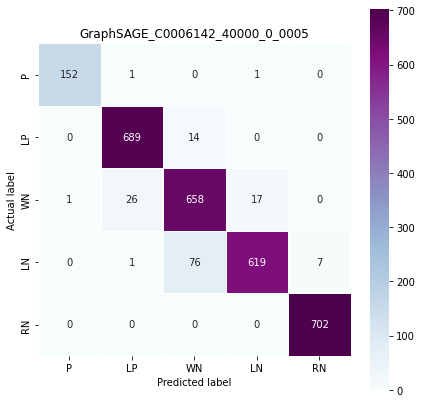

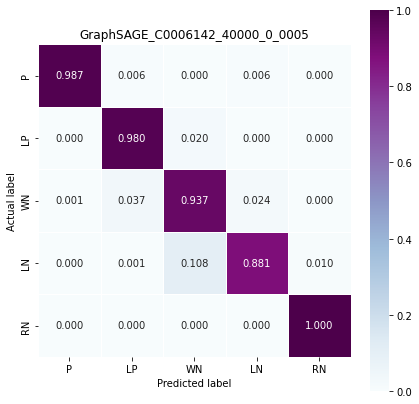

In [5]:
model_name  = 'GraphSAGE_' + disease_Id + '_40000_0_0005'
classes     = ['P', 'LP', 'WN', 'LN', 'RN']

preds, probs, model = predict_from_saved_model(model_name, dataset, classes, save_to_file=False)

### Explainabilty

In [6]:
ranking = get_ranking(model, dataset, preds, probs, disease_Id, n_positive=10, explanation_nodes_ratio=1, masks_for_seed=10, G=G)

  0%|          | 0/10 [00:00<?, ?it/s]

In [11]:
k = 100
precision = validate_with_extended_dataset(ranking[:k], disease_Id, save_ranking_to_file=False)
print(precision/k)

0.84
